In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
data = pd.read_csv('crop_production.csv')

In [218]:
data.tail(20)

State_Name District_Name  Crop_Year       Season  \
246071  West Bengal       PURULIA       2014  Rabi          
246072  West Bengal       PURULIA       2014  Rabi          
246073  West Bengal       PURULIA       2014  Rabi          
246074  West Bengal       PURULIA       2014  Rabi          
246075  West Bengal       PURULIA       2014  Rabi          
246076  West Bengal       PURULIA       2014  Rabi          
246077  West Bengal       PURULIA       2014  Rabi          
246078  West Bengal       PURULIA       2014  Rabi          
246079  West Bengal       PURULIA       2014  Rabi          
246080  West Bengal       PURULIA       2014  Rabi          
246081  West Bengal       PURULIA       2014  Rabi          
246082  West Bengal       PURULIA       2014  Rabi          
246083  West Bengal       PURULIA       2014  Rabi          
246084  West Bengal       PURULIA       2014  Rabi          
246085  West Bengal       PURULIA       2014  Summer        
246086  West Bengal       PURULIA       2014  Summer        
246087  West Bengal       PURULIA       2014  Summer        
246088  West Bengal       PURULIA       2014  Whole Year    
246089  West Bengal       PURULIA       2014  Winter        
246090  West Bengal       PURULIA       2014  Winter        

                         Crop      Area  Production  
246071              Arhar/Tur     671.0       723.0  
246072                   Gram     198.0       203.0  
246073              Groundnut      30.0        25.0  
246074             Horse-gram     660.0       332.0  
246075                Khesari     146.0       126.0  
246076                Linseed     160.0        51.0  
246077                 Masoor      31.0        19.0  
246078      Moong(Green Gram)      64.0        40.0  
246079  Peas & beans (Pulses)      12.0        12.0  
246080                 Potato     477.0      9995.0  
246081      Rapeseed &Mustard    1885.0      1508.0  
246082              Safflower      54.0        37.0  
246083                   Urad     220.0       113.0  
246084                  Wheat    1622.0      3663.0  
246085                  Maize     325.0      2039.0  
246086                   Rice     306.0       801.0  
246087                Sesamum     627.0       463.0  
246088              Sugarcane     324.0     16250.0  
246089                   Rice  279151.0    597899.0  
246090                Sesamum     175.0        88.0

### Checking Null Values

In [219]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

### Unique Values

In [220]:
data.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [221]:
data.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [222]:
data['Season'] = data.Season.apply(lambda x:x.strip())

### Kharif
Early-May – usually at the beginning of the first monsoon rains
### Rabi
mid-November – preferably after the monsoon rains

### Different Crops 

In [223]:
data.Crop.unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

### On which season production is high?

In [224]:
tmp = data[data['Season']!='Whole Year'].groupby(['Season'])['Production'].mean()

Text(0.5, 0, 'Season')

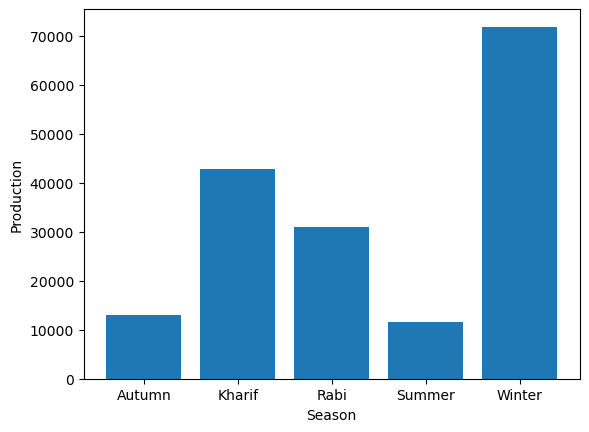

In [225]:
plt.bar(tmp.index.tolist(), tmp.tolist())
plt.ylabel('Production')
plt.xlabel('Season')

### On which Year Production is high?

In [276]:
tmp = data.groupby(['Crop_Year'])['Production'].sum()
index1 = tmp.index
values = tmp.tolist()

Text(0.5, 0, 'Year')

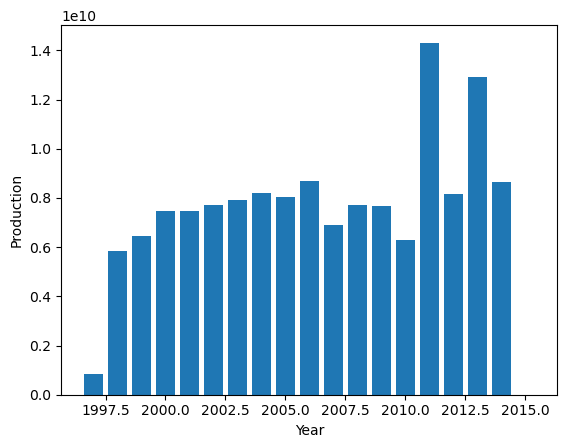

In [277]:
plt.bar(tmp.index.tolist(), tmp.tolist())
plt.ylabel('Production')
plt.xlabel('Year')

### States Producing Crops in Large Area

In [228]:
tmp = data.groupby(['State_Name'])['Area'].mean()

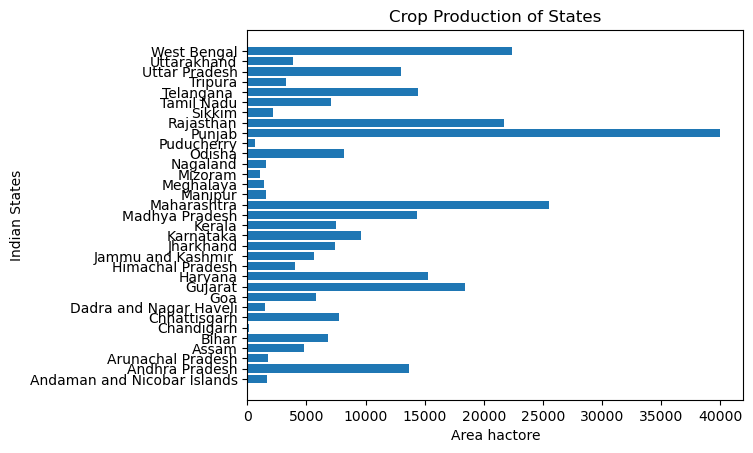

In [229]:
x = tmp.index.tolist()
y = tmp.tolist()

plt.barh(x, y)
plt.ylabel("Indian States")
 
plt.xlabel("Area hactore")
plt.title("Crop Production of States")
plt.show()

### States Producing Crops in Large Scale

In [230]:
tmp = data.groupby(['State_Name'])['Production'].sum()

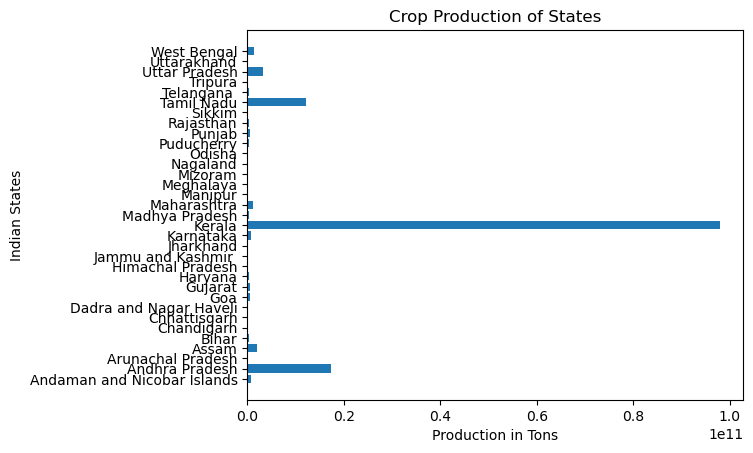

In [231]:
x = tmp.index.tolist()
y = tmp.tolist()

plt.barh(x, y)
plt.ylabel("Indian States")
 
plt.xlabel("Production in Tons")
plt.title("Crop Production of States")
plt.show()

Kerala is producing in Tons because of kerala forms more coconut

### Top 1 states which producing each crops

In [232]:
for i in data.Crop.unique():
    tmp = data[data['Crop'] == i].groupby(['State_Name'])['Production'].mean()
    t = tmp.sort_values(ascending=False).index[0]
    
    print(f'\033[1m{i}\033[0m is produced largely by \033[1m\033[4m{t}\033[0m\033[0m than any other states')

Arecanut is produced largely by Karnataka than any other states
Other Kharif pulses is produced largely by Uttar Pradesh than any other states
Rice is produced largely by Punjab than any other states
Banana is produced largely by Gujarat than any other states
Cashewnut is produced largely by Goa than any other states
Coconut  is produced largely by Kerala than any other states
Dry ginger is produced largely by Karnataka than any other states
Sugarcane is produced largely by Maharashtra than any other states
Sweet potato is produced largely by Odisha than any other states
Tapioca is produced largely by Kerala than any other states
Black pepper is produced largely by Kerala than any other states
Dry chillies is produced largely by Andhra Pradesh than any other states
other oilseeds is produced largely by Andhra Pradesh than any other states
Turmeric is produced largely by Telangana  than any other states
Maize is produced largely by Telangana  than any other states
Moong(Green Gram) is p

Water Melon is produced largely by Madhya Pradesh than any other states
Total foodgrain is produced largely by Uttar Pradesh than any other states
Kapas is produced largely by Meghalaya than any other states
Colocosia is produced largely by Nagaland than any other states
Lentil is produced largely by Uttarakhand than any other states
Bean is produced largely by Nagaland than any other states
Jobster is produced largely by Nagaland than any other states
Perilla is produced largely by Nagaland than any other states
Rajmash Kholar is produced largely by Nagaland than any other states
Ricebean (nagadal) is produced largely by Nagaland than any other states
Ash Gourd is produced largely by Tamil Nadu than any other states
Beet Root is produced largely by Tamil Nadu than any other states
Lab-Lab is produced largely by Tamil Nadu than any other states
Ribed Guard is produced largely by Tamil Nadu than any other states
Yam is produced largely by Tamil Nadu than any other states
Apple is produc

### Crops, which is produced in both summer and winter

In [233]:
a = set(data[data['Season'] == 'Summer'].Crop.unique())
b = set(data[data['Season'] == 'Winter'].Crop.unique()) 

list(a.intersection(b))

['Moong(Green Gram)',
 'Banana',
 'Cotton(lint)',
 'Sesamum',
 'Maize',
 'Horse-gram',
 'Onion',
 'Turmeric',
 'Peas & beans (Pulses)',
 'Sunflower',
 'Arhar/Tur',
 'Urad',
 'Dry ginger',
 'Dry chillies',
 'Wheat',
 'Groundnut',
 'Potato',
 'Ragi',
 'Rice',
 'Paddy',
 'Sugarcane']

### Crops, which is produced in all three seasons (Autumn, Summer, Winter)

In [234]:
a = set(data[data['Season'] == 'Summer'].Crop.unique())
b = set(data[data['Season'] == 'Winter'].Crop.unique()) 
c = set(data[data['Season'] == 'Autumn'].Crop.unique())

a.intersection(b, c)

{'Arhar/Tur',
 'Banana',
 'Cotton(lint)',
 'Dry chillies',
 'Dry ginger',
 'Groundnut',
 'Maize',
 'Moong(Green Gram)',
 'Onion',
 'Paddy',
 'Peas & beans (Pulses)',
 'Potato',
 'Ragi',
 'Rice',
 'Sesamum',
 'Sugarcane',
 'Turmeric',
 'Urad'}

### Crops which is produced largely in tons

In [235]:
a = data.groupby(['Crop'])['Production'].sum().sort_values(ascending=False)
index1 = list(a.index[:5])
values = a.tolist()[:5]
tmp_sum = sum(values)
total_production = sum(a.tolist())

tm2 = total_production-tmp_sum

values = [i*100/total_production for i in values]
tm2 = tm2/total_production
values.append(tm2)
index1.append('Other')

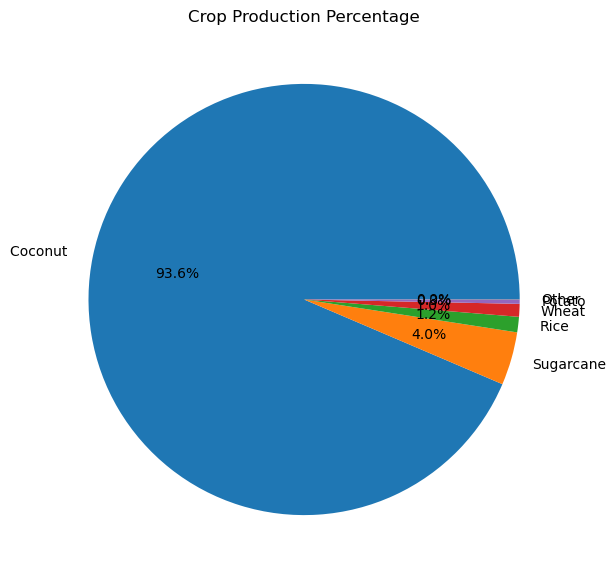

In [236]:
plt.figure(figsize=(7, 7))
plt.pie(values, labels=index1, autopct='%1.1f%%')
plt.title('Crop Production Percentage')
plt.show()

### Top Crops Produced in large area percentage

In [237]:
a = data.groupby(['Crop'])['Area'].sum().sort_values(ascending=False)
index1 = list(a.index[:5])
values = a.tolist()[:5]
tmp_sum = sum(values)
total_production = sum(a.tolist())

tm2 = total_production-tmp_sum

values = [i*100/total_production for i in values]
tm2 = tm2/total_production
values.append(tm2)
index1.append('Other')

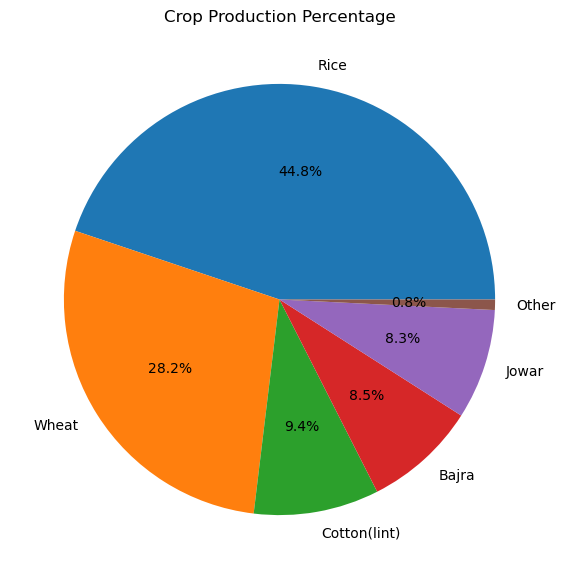

In [238]:
plt.figure(figsize=(7, 7))
plt.pie(values, labels=index1, autopct='%1.1f%%')
plt.title('Crop Production Percentage')
plt.show()

### Crops, which is produced in Large scale and with small area

In [239]:
a = set(data.groupby(['Crop'])['Production'].sum().sort_values(ascending=False)[:62].index)
b = set(data.groupby(['Crop'])['Area'].sum().sort_values(ascending=True)[:62].index)

In [240]:
c = list(a.intersection(b))
c

['Pineapple', 'Brinjal', 'Grapes', 'Papaya', 'Orange']

In [241]:
q = data.groupby(['Crop'])['Production'].sum().sort_values(ascending=False)[:62][c].tolist()
w = data.groupby(['Crop'])['Area'].sum().sort_values(ascending=True)[:62][c].tolist()

df = pd.DataFrame(columns=['Crop', 'Area', 'Production'])
df['Crop'] = c
df['Area'] = w
df['Production'] = q
df

Crop      Area  Production
0  Pineapple  162760.0   2127594.0
1    Brinjal  155948.0   1442172.0
2     Grapes   66903.0   1751593.0
3     Papaya  133044.0   3922521.0
4     Orange  205201.0   2338803.0

### Crops, which is produced in small scale and with large area

In [242]:
a = set(data.groupby(['Crop'])['Production'].sum().sort_values(ascending=True)[:62].index)
b = set(data.groupby(['Crop'])['Area'].sum().sort_values(ascending=False)[:62].index)

c = list(a.intersection(b))
c

q = data.groupby(['Crop'])['Production'].sum().sort_values(ascending=True)[:62][c].tolist()
w = data.groupby(['Crop'])['Area'].sum().sort_values(ascending=False)[:62][c].tolist()

df = pd.DataFrame(columns=['Crop', 'Area', 'Production'])
df['Crop'] = c
df['Area'] = w
df['Production'] = q
df

Crop        Area  Production
0    Other Vegetables   477211.00    963212.0
1          Jack Fruit   281320.00     60774.0
2  Other Fresh Fruits   276399.00    399443.0
3            Cardamom  1040868.87    171742.7
4       Cowpea(Lobia)   510772.00    240638.0

### Top 5 State which produces Tons of Crops in each year

In [247]:
yr = data.Crop_Year.unique()

for i in yr:
    hj = data[data['Crop_Year'] == i].groupby(['State_Name'])['Production'].sum().sort_values(ascending=False).index[:5]
    print(i, '---', ",".join(hj), '\n')

2000 --- Kerala,Andhra Pradesh,Uttar Pradesh,Assam,Andaman and Nicobar Islands 

2001 --- Kerala,Andhra Pradesh,Uttar Pradesh,Assam,Andaman and Nicobar Islands 

2002 --- Kerala,Andhra Pradesh,Uttar Pradesh,Assam,Andaman and Nicobar Islands 

2003 --- Kerala,Andhra Pradesh,Uttar Pradesh,Assam,Andaman and Nicobar Islands 

2004 --- Kerala,Andhra Pradesh,Assam,Uttar Pradesh,Goa 

2005 --- Kerala,Andhra Pradesh,Uttar Pradesh,Goa,Andaman and Nicobar Islands 

2006 --- Kerala,Andhra Pradesh,West Bengal,Uttar Pradesh,Assam 

2010 --- Kerala,Assam,Uttar Pradesh,Maharashtra,Andaman and Nicobar Islands 

1997 --- Tamil Nadu,Uttar Pradesh,West Bengal,Karnataka,Punjab 

1998 --- Kerala,Uttar Pradesh,Assam,Tamil Nadu,Maharashtra 

1999 --- Kerala,Uttar Pradesh,Assam,Maharashtra,Tamil Nadu 

2007 --- Kerala,West Bengal,Uttar Pradesh,Assam,Goa 

2008 --- Kerala,Andhra Pradesh,Assam,Uttar Pradesh,Maharashtra 

2009 --- Kerala,Andhra Pradesh,Assam,Uttar Pradesh,Maharashtra 

2011 --- Tamil Nadu,Kerala

### Top Crop Production States Tons to Percentage

In [283]:
a = data.groupby(['State_Name'])['Production'].sum().sort_values(ascending=False)
index1 = list(a.index[:9])
values = a.tolist()[:9]
tmp_sum = sum(values)
total_production = sum(a.tolist())

tm2 = total_production-tmp_sum

values = [i*100/total_production for i in values]
tm2 = tm2/total_production
values.append(tm2)
index1.append('Other States')

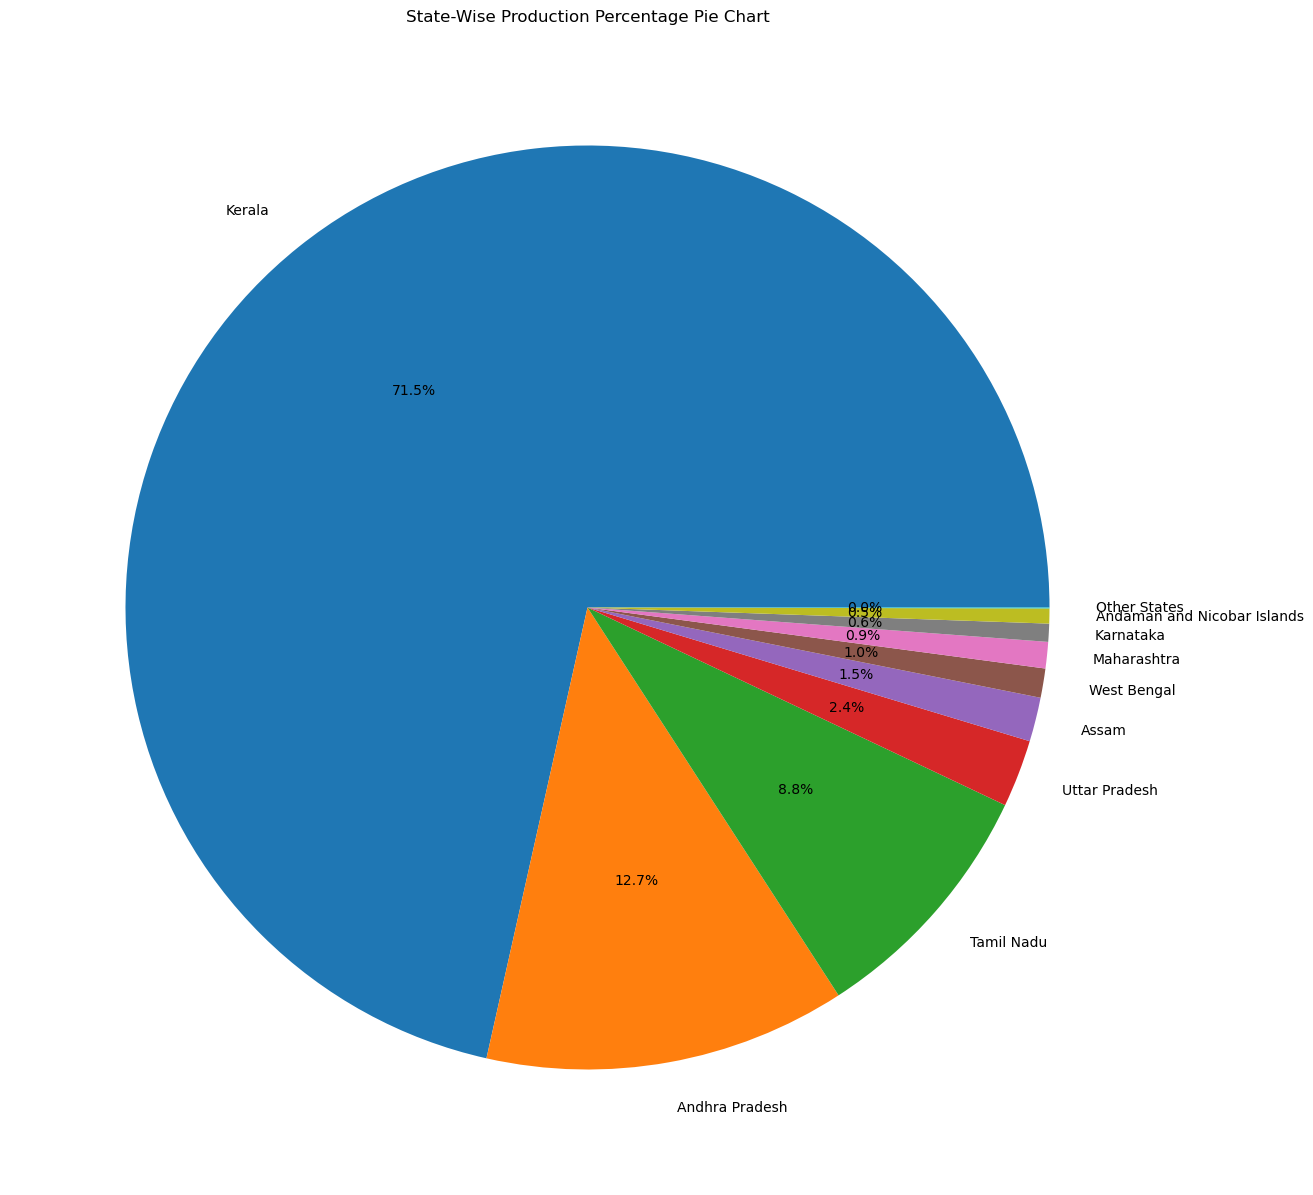

In [284]:
plt.figure(figsize=(15, 15))
plt.pie(values, labels=index1, autopct='%1.1f%%')
plt.title('State-Wise Production Percentage Pie Chart')
plt.show()